In [24]:
from __future__ import absolute_import, division, print_function

from IPython.display import Image as IImage, display
import numpy as np
import PIL
from PIL import Image
import random
import requests
import tensorflow as tf

In [2]:
# Download an image.
d = requests.get("https://www.paristoolkit.com/Images/xeffel_view.jpg.pagespeed.ic.8XcZNqpzSj.jpg")
with open("image.jpeg", "wb") as f:
    f.write(d.content)

In [3]:
# Load image to numpy array.
img = PIL.Image.open('image.jpeg')
img.load()
img_array = np.array(img)

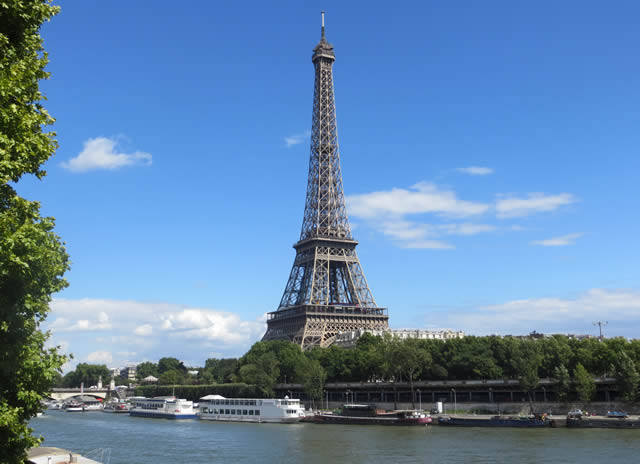

In [4]:
# Display image.
PIL.Image.fromarray(img_array)

In [5]:
# Create TensorFlow session.
session = tf.Session()

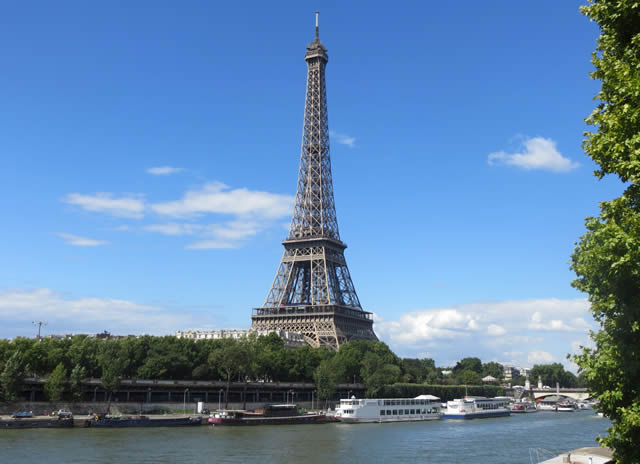

In [6]:
# Randomly flip an image.
def random_flip_left_right(image):
    return tf.image.random_flip_left_right(image)

# Display randomly flipped image.
PIL.Image.fromarray(random_flip_left_right(img_array).eval(session=session))

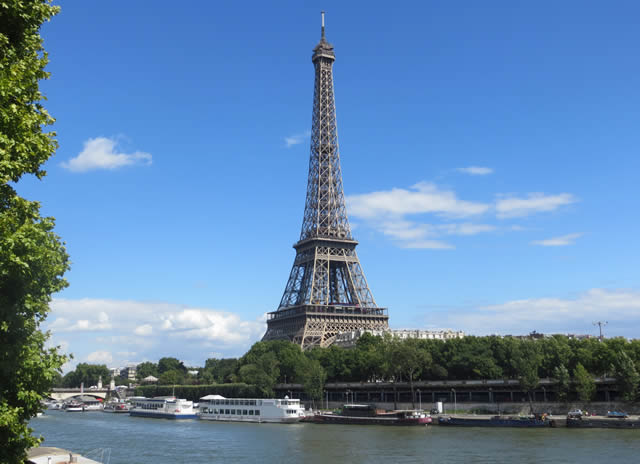

In [10]:
# Randomly change an image contrast.
def random_contrast(image, minval=0.6, maxval=1.4):
    r = tf.random_uniform([], minval=minval, maxval=maxval)
    image = tf.image.adjust_contrast(image, contrast_factor=r)
    return tf.cast(image, tf.uint8)

# Display image with different contrast.
PIL.Image.fromarray(random_contrast(img_array).eval(session=session))

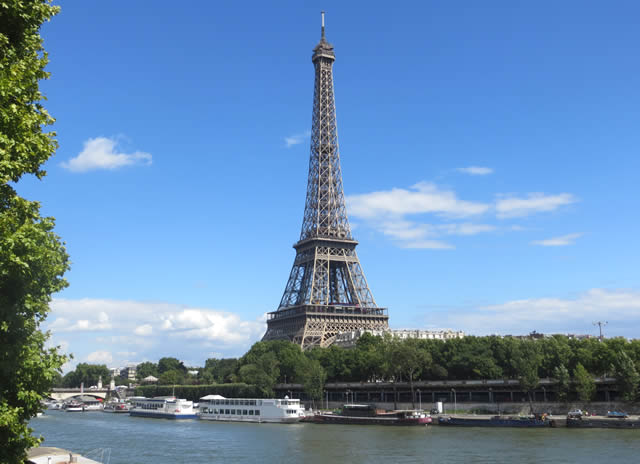

In [12]:
# Randomly change an image brightness
def random_brightness(image, minval=0., maxval=.2):
    r = tf.random_uniform([], minval=minval, maxval=maxval)
    image = tf.image.adjust_brightness(image, delta=r)
    return tf.cast(image, tf.uint8)

# Display image with different brightness.
PIL.Image.fromarray(random_brightness(img_array).eval(session=session))

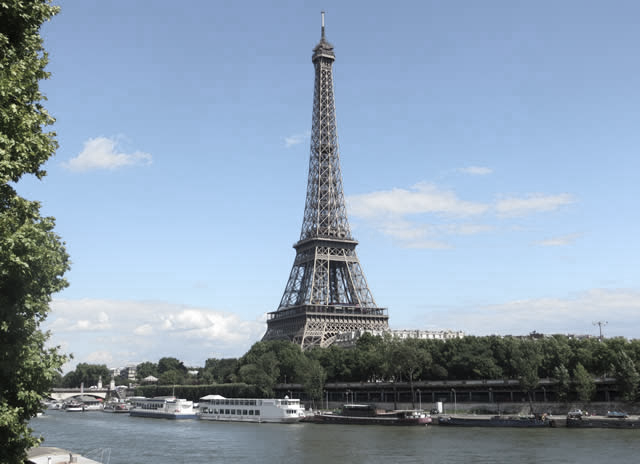

In [13]:
# Randomly change an image saturation
def random_saturation(image, minval=0.4, maxval=2.):
    r = tf.random_uniform((), minval=minval, maxval=maxval)
    image = tf.image.adjust_saturation(image, saturation_factor=r)
    return tf.cast(image, tf.uint8)

# Display image with different staturation.
PIL.Image.fromarray(random_saturation(img_array).eval(session=session))

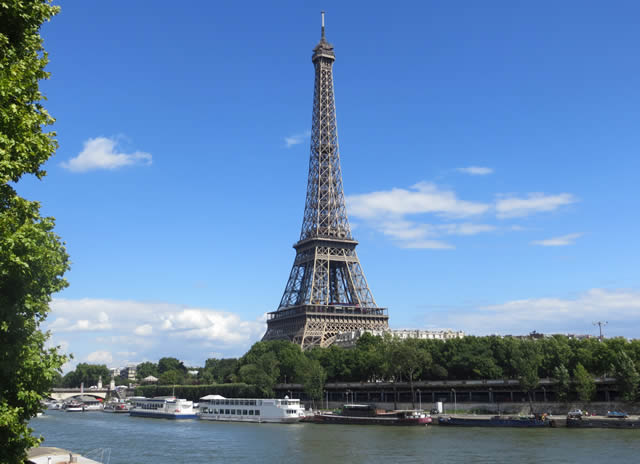

In [14]:
# Randomly change an image hue.
def random_hue(image, minval=-0.04, maxval=0.08):
    r = tf.random_uniform((), minval=minval, maxval=maxval)
    image = tf.image.adjust_hue(image, delta=r)
    return tf.cast(image, tf.uint8)

# Display image with different hue.
PIL.Image.fromarray(random_hue(img_array).eval(session=session))

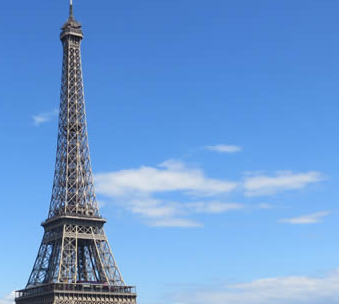

In [15]:
# Distort an image by cropping it with a different aspect ratio.
def distorted_random_crop(image,
                          min_object_covered=0.1,
                          aspect_ratio_range=(3./4., 4./3.),
                          area_range=(0.06, 1.0),
                          max_attempts=100,
                          scope=None):

    cropbox = tf.constant([0.0, 0.0, 1.0, 1.0], dtype=tf.float32, shape=[1, 1, 4])
    sample_distorted_bounding_box = tf.image.sample_distorted_bounding_box(tf.shape(image),
                                                                           bounding_boxes=cropbox,
                                                                           min_object_covered=min_object_covered,
                                                                           aspect_ratio_range=aspect_ratio_range,
                                                                           area_range=area_range,
                                                                           max_attempts=max_attempts,
                                                                           use_image_if_no_bounding_boxes=True)
    bbox_begin, bbox_size, distort_bbox = sample_distorted_bounding_box

    # Crop the image to the specified bounding box.
    cropped_image = tf.slice(image, bbox_begin, bbox_size)
    return cropped_image

# Display cropped image.
PIL.Image.fromarray(distorted_random_crop(img_array).eval(session=session))

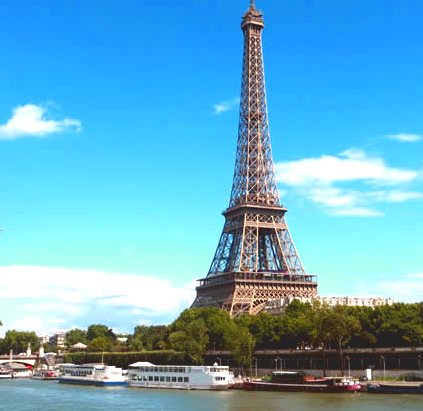

In [16]:
# Apply all transformations to an image.
# That is a common image augmentation technique for image datasets, such as ImageNet.
def transform_image(image):
    image = distorted_random_crop(image)
    image = random_flip_left_right(image)
    image = random_contrast(image)
    image = random_brightness(image)
    image = random_hue(image)
    image = random_saturation(image)
    return image

# Display fully pre-processed image.
transformed_img = transform_image(img_array)
PIL.Image.fromarray(transformed_img.eval(session=session))

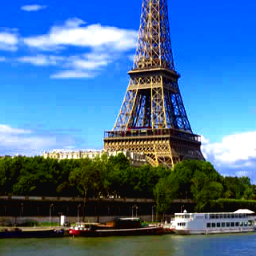

In [23]:
# Resize transformed image to a 256x256px square image, ready for training.
def resize_image(image):
    image = tf.image.resize_images(image, size=(256, 256))
    image = tf.cast(image, tf.uint8)
    return image

# Display resized image.
PIL.Image.fromarray(resize_image(transformed_img).eval(session=session))